In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
from io import StringIO

aa = '''iupac\tthree_letter	name
A	Ala	Alanine
C	Cys	Cysteine
D	Asp	Aspartic Acid
E	Glu	Glutamic Acid
F	Phe	Phenylalanine
G	Gly	Glycine
H	His	Histidine
I	Ile	Isoleucine
K	Lys	Lysine
L	Leu	Leucine
M	Met	Methionine
N	Asn	Asparagine
P	Pro	Proline
Q	Gln	Glutamine
R	Arg	Arginine
S	Ser	Serine
T	Thr	Threonine
V	Val	Valine
W	Trp	Tryptophan
Y	Tyr	Tyrosine'''
aa_df = pd.read_csv(StringIO(aa), sep='\t')
aa_df


,iupac,three_letter,name
0,A,Ala,Alanine
1,C,Cys,Cysteine
2,D,Asp,Aspartic Acid
3,E,Glu,Glutamic Acid
4,F,Phe,Phenylalanine
5,G,Gly,Glycine
6,H,His,Histidine
7,I,Ile,Isoleucine
8,K,Lys,Lysine
9,L,Leu,Leucine


In [15]:
mutscores_df = pd.read_csv('results/myl3.tsv', sep='\t').assign(wt_residue=lambda df:df['background_mutation'].apply(lambda x: x[0]))
mutscores_df = mutscores_df[(mutscores_df['residue'] != mutscores_df['wt_residue']) & (mutscores_df['residue'].isin(aa_df['iupac']))]
mutscores_df.sort_values('score')

,Unnamed: 0,model,background_mutation,residue,sequence_idx,score,wt_residue
21976,2671,esm1v_t33_650M_UR90S_1,A13T,D,137,-23.792590,A
2671,2671,esm1v_t33_650M_UR90S_1,M149V,D,137,-23.610518,M
9106,2671,esm1v_t33_650M_UR90S_1,A154H,D,137,-23.399360,A
15541,2671,esm1v_t33_650M_UR90S_1,G143L,D,137,-23.152859,G
21785,2480,esm1v_t33_650M_UR90S_1,A13T,I,141,-22.578537,A
...,...,...,...,...,...,...,...
20541,1236,esm1v_t33_650M_UR90S_1,A13T,G,67,2.475622,A
1236,1236,esm1v_t33_650M_UR90S_1,M149V,G,67,2.503442,M
15547,2677,esm1v_t33_650M_UR90S_1,G143L,D,143,3.861005,G
8538,2103,esm1v_t33_650M_UR90S_1,A154H,R,154,4.573592,A


Text(0.5, 1.0, 'MYL3')

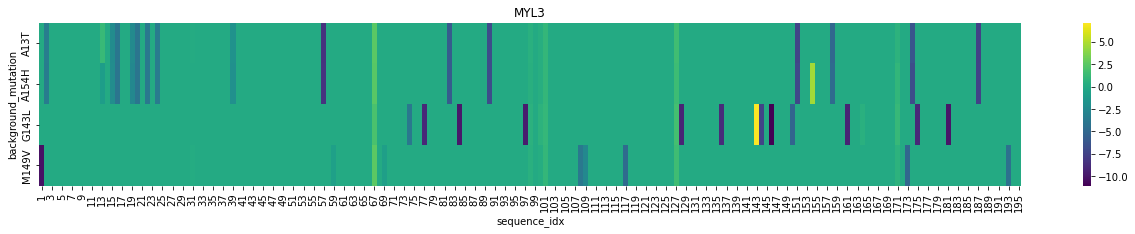

In [23]:
plt.figure(figsize=(22,3))
sns.heatmap(
    data=(mutscores_df.groupby(['background_mutation', 'sequence_idx'])['score'].max()
          .reset_index()
          .pivot(index='background_mutation', columns='sequence_idx', values='score')
         ),
    cmap='viridis'
)
plt.title('MYL3')